## Imorting important library 

In [18]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Loading Data.. 

In [75]:
#Loading dataset
df = pd.read_csv(r'C:\Users\hp\Desktop\Stroke prediction\healthcare-dataset-stroke-data.csv')

df.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3357,32717,Male,16.0,0,0,No,children,Rural,106.11,22.4,Unknown,0
276,45801,Female,38.0,0,0,No,Private,Rural,97.49,26.9,never smoked,0
452,23221,Male,29.0,0,0,No,Private,Urban,83.51,37.1,never smoked,0
3328,42348,Male,72.0,0,1,Yes,Self-employed,Urban,63.86,29.5,smokes,0
3564,9879,Female,55.0,0,1,Yes,Private,Urban,199.38,39.0,Unknown,0


## Data Preparation 

In [21]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [23]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [78]:
#Filling the null values

df['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [25]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [26]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [27]:
df['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [28]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

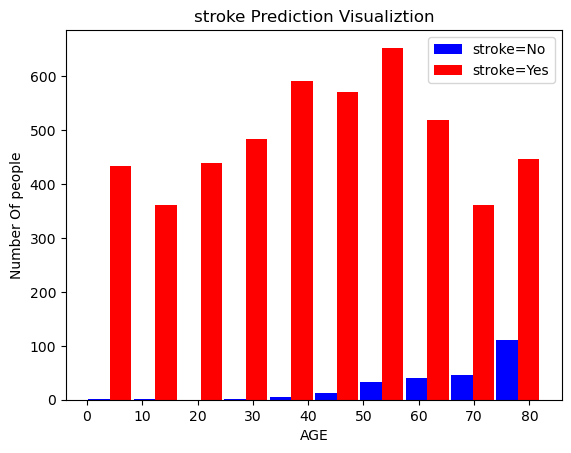

In [79]:
#Data Visualization
age_stroke_no = df[df.stroke==0].age
age_stroke_yes = df[df.stroke==1].age

plt.xlabel("AGE")
plt.ylabel("Number Of people")
plt.title("stroke Prediction Visualiztion")

plt.hist([age_stroke_yes ,age_stroke_no], rwidth=0.95, color=['blue','red'] ,label=['stroke=No','stroke=Yes'])
plt.legend()

In [30]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [31]:
print_unique_col_values(df)

gender: ['Male' 'Female' 'Other']
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [32]:
yes_no_columns = ['ever_married']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [33]:
print_unique_col_values(df)

gender: ['Male' 'Female' 'Other']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [34]:
#Hot encoding
df2 = pd.get_dummies(data=df, columns=['gender','work_type','Residence_type','smoking_status'])
df2.columns

Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'stroke', 'gender_Female', 'gender_Male',
       'gender_Other', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [35]:
df2.sample(5)

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
288,17.0,0,0,0,82.18,23.4,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0
3543,5.0,0,0,0,94.49,16.6,0,0,1,0,...,0,0,0,1,0,1,1,0,0,0
2418,82.0,0,1,1,229.58,23.7,0,1,0,0,...,0,0,1,0,1,0,1,0,0,0
1746,24.0,1,0,1,80.63,28.2,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
2725,12.0,0,0,0,150.03,28.2,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0


In [36]:
df2.dtypes

age                               float64
hypertension                        int64
heart_disease                       int64
ever_married                        int64
avg_glucose_level                 float64
bmi                               float64
stroke                              int64
gender_Female                       uint8
gender_Male                         uint8
gender_Other                        uint8
work_type_Govt_job                  uint8
work_type_Never_worked              uint8
work_type_Private                   uint8
work_type_Self-employed             uint8
work_type_children                  uint8
Residence_type_Rural                uint8
Residence_type_Urban                uint8
smoking_status_Unknown              uint8
smoking_status_formerly smoked      uint8
smoking_status_never smoked         uint8
smoking_status_smokes               uint8
dtype: object

## Feature Scaling

In [37]:
cols_to_scale = ['age','avg_glucose_level','bmi']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [38]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

age: [8.16894531e-01 7.43652344e-01 9.75585938e-01 5.97167969e-01
 9.63378906e-01 9.87792969e-01 9.02343750e-01 8.41308594e-01
 7.19238281e-01 9.51171875e-01 6.58203125e-01 6.09375000e-01
 7.80273438e-01 9.14550781e-01 7.31445312e-01 6.94824219e-01
 8.65722656e-01 6.33789062e-01 1.00000000e+00 7.92480469e-01
 7.07031250e-01 5.11718750e-01 5.84960938e-01 8.77929688e-01
 7.68066406e-01 9.26757812e-01 4.75097656e-01 9.38964844e-01
 8.90136719e-01 6.82617188e-01 5.48339844e-01 8.53515625e-01
 8.04687500e-01 6.21582031e-01 5.23925781e-01 8.29101562e-01
 5.72753906e-01 6.45996094e-01 4.62890625e-01 6.70410156e-01
 1.51367188e-02 5.60546875e-01 3.89648438e-01 1.69921875e-01
 3.56445312e-02 9.66796875e-02 4.50683594e-01 4.87304688e-01
 4.26269531e-01 2.43164062e-01 5.36132812e-01 3.04199219e-01
 3.28613281e-01 2.79785156e-01 2.06542969e-01 1.57714844e-01
 4.78515625e-02 1.94335938e-01 2.67578125e-01 3.65234375e-01
 3.53027344e-01 1.33300781e-01 2.55371094e-01 2.18750000e-01
 4.01855469e-01 2.9

In [39]:
X = df2.drop(columns=['stroke'])  
y = df2['stroke']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [63]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Architecture 

In [64]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

## Compiling the Model 

In [65]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training the model

In [72]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
128/128 [==============================] - 0s 3ms/step - loss: 0.1237 - accuracy: 0.9567
Epoch 2/10
128/128 [==============================] - 0s 3ms/step - loss: 0.1224 - accuracy: 0.9565
Epoch 3/10
128/128 [==============================] - 0s 3ms/step - loss: 0.1217 - accuracy: 0.9572
Epoch 4/10
128/128 [==============================] - 0s 3ms/step - loss: 0.1216 - accuracy: 0.9572
Epoch 5/10
128/128 [==============================] - 0s 3ms/step - loss: 0.1198 - accuracy: 0.9579
Epoch 6/10
128/128 [==============================] - 0s 3ms/step - loss: 0.1186 - accuracy: 0.9574
Epoch 7/10
128/128 [==============================] - 0s 4ms/step - loss: 0.1177 - accuracy: 0.9587
Epoch 8/10
128/128 [==============================] - 0s 3ms/step - loss: 0.1184 - accuracy: 0.9567
Epoch 9/10
128/128 [==============================] - 0s 4ms/step - loss: 0.1163 - accuracy: 0.9589
Epoch 10/10
128/128 [==============================] - 0s 4ms/step - loss: 0.1141 - accuracy: 0.9594

## Model Evaluation

In [73]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

class_labels = np.unique(y_train)
y_pred_labels = [class_labels[i] for i in y_pred]

32/32 [==============================] - 0s 2ms/step


In [74]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9510763209393346


In [80]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
